In [1]:
import os
os.chdir('..')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
publications = pd.read_csv('gs://merged-ec/publications.csv', 
                         storage_options={"token": "functions/prodnet-ec-7b8861f1f0a3.json"},
                         encoding='utf-8')
publications

,iid,iyear,iprovince,icity,iproduct,oid,oyear,oprovince,ocity,oproduct,network
0,EPN9,2019,PICHINCHA,QUITO,J6311,EPN12,2019,PICHINCHA,QUITO,M7120,research
1,EPN9,2019,PICHINCHA,QUITO,J6202,EPN12,2019,PICHINCHA,QUITO,M7120,research
2,EPN9,2019,PICHINCHA,QUITO,J6311,INDOAMERICA4,2019,TUNGURAHUA,AMBATO,M7120,research
3,EPN9,2019,PICHINCHA,QUITO,J6202,INDOAMERICA4,2019,TUNGURAHUA,AMBATO,M7120,research
4,EPN9,2019,PICHINCHA,QUITO,J6311,UDLA5,2019,PICHINCHA,QUITO,M7120,research
...,...,...,...,...,...,...,...,...,...,...,...
3980,UTPL378,2016,LOJA,LOJA,J6311,YACHAY36,2018,IMBABURA,URCUQUI,C2651,research
3981,UTPL378,2016,LOJA,LOJA,J6311,YACHAY36,2018,IMBABURA,URCUQUI,D3510,research
3982,UTPL378,2016,LOJA,LOJA,J6209,YACHAY36,2018,IMBABURA,URCUQUI,C2710,research
3983,UTPL378,2016,LOJA,LOJA,J6209,YACHAY36,2018,IMBABURA,URCUQUI,C2651,research


In [3]:
# In a first analysis, I'll focus only in the data as transversal data. Eventually I'll focus on the effects on different years
# This implies that I don't want years variables yet

publications = publications[[c for c in publications.columns if 'year' not in c]]

# The next information that I need is, how much times a city has cited a publication from a different one. The id of
# the university will be not longer necessary

publications = publications[[c for c in publications.columns if 'id' not in c]]

# I don't want that cases in which the city that is citing is the same that is cited

publications = publications.loc[publications['icity'] != publications['ocity']]

# finally, I can aggregate by icity-ocity the amount of cites

# To add a column 'share' = 1, is necessary thank to the aggregation method

publications['share'] = 1

cites = publications.groupby(by=[c for c in publications.columns if c != 'share']).count().reset_index()
cites

,iprovince,icity,iproduct,oprovince,ocity,oproduct,network,share
0,AZUAY,CUENCA,C2651,EL ORO,MACHALA,C2592,research,1
1,AZUAY,CUENCA,C2651,GUAYAS,GUAYAQUIL,C3012,research,1
2,AZUAY,CUENCA,C2651,GUAYAS,GUAYAQUIL,J6311,research,1
3,AZUAY,CUENCA,C2651,GUAYAS,GUAYAQUIL,O8412,research,1
4,AZUAY,CUENCA,C2651,GUAYAS,GUAYAQUIL,U9900,research,1
...,...,...,...,...,...,...,...,...
2123,TUNGURAHUA,AMBATO,J6311,IMBABURA,URCUQUI,C2651,research,2
2124,TUNGURAHUA,AMBATO,J6311,IMBABURA,URCUQUI,D3510,research,2
2125,TUNGURAHUA,AMBATO,J6311,IMBABURA,URCUQUI,C2710,research,2
2126,TUNGURAHUA,AMBATO,J6311,PICHINCHA,QUITO,M7120,research,3


### Some Descriptive Statistics

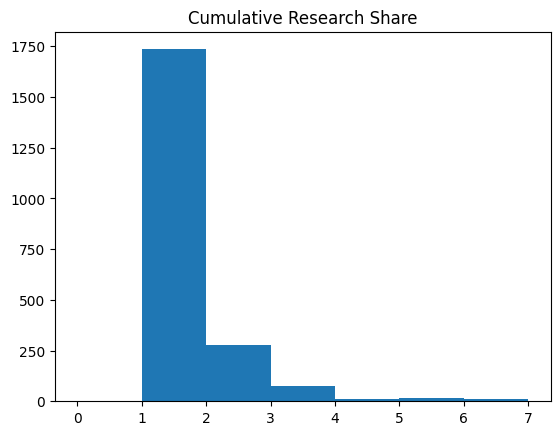

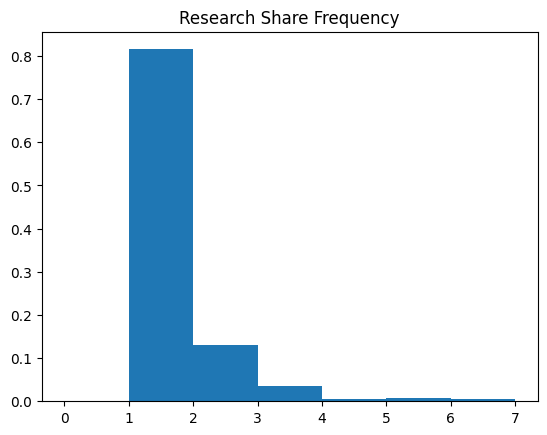

In [4]:
# This code is to show the distribution of the similarity values:

plt.hist(cites['share'], bins = np.arange(0, cites['share'].max()+1, 1))
plt.title("Cumulative Research Share") 
plt.show()

plt.hist(cites['share'], bins = np.arange(0, cites['share'].max()+1, 1), density=True)
plt.title("Research Share Frequency") 
plt.show()

 This shows that the most common situation is to cite only ones. It is important to remember that, this information is not
 aggregated by ISIC4 yet. Also, the cases that are citing between 2 and 6 times could be outlier cases.

### Products Matrix

In [5]:
cities = cites[['iprovince', 'icity', 'share']]

# The first reflection says the number of times that a paper from that city has been cited

cities = cities.groupby(by=[c for c in cities.columns if (c != 'share')]).count().reset_index()
cities.rename(columns={'share':'k110', 'iprovince': 'province', 'icity': 'city'}, inplace=True)

cities

,province,city,k110
0,AZUAY,CUENCA,351
1,CHIMBORAZO,RIOBAMBA,30
2,GUAYAS,GUAYAQUIL,66
3,GUAYAS,SAMBORONDÓN,118
4,LOJA,LOJA,208
5,LOS RÍOS,QUEVEDO,3
6,PICHINCHA,QUITO,1269
7,PICHINCHA,SANGOLQUÍ,55
8,SANTA ELENA,LA LIBERTAD,3
9,TUNGURAHUA,AMBATO,25


In [6]:
products = cites[['iproduct', 'share']]

products = products.groupby(by=[c for c in products.columns if (c != 'share')]).count().reset_index()
products.rename(columns={'share':'k100', 'iproduct': 'product'}, inplace=True)
products

,product,k100
0,A0122,7
1,A0126,3
2,A0128,2
3,A0129,3
4,B0891,2
...,...,...
68,M7220,3
69,N7810,6
70,O8412,115
71,P8510,1


In [7]:
# The second reflection says the the sum of the products types that a paper cited

cited = cites[['iprovince', 'icity', 'iproduct']]
cited.rename(columns={'iprovince':'province', 'icity':'city', 'iproduct':'product'}, inplace=True)
cited = cited.drop_duplicates()
cited

C:\Users\Marcello\AppData\Local\Temp/ipykernel_11768/2247426182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cited.rename(columns={'iprovince':'province', 'icity':'city', 'iproduct':'product'}, inplace=True)


,province,city,product
0,AZUAY,CUENCA,C2651
113,AZUAY,CUENCA,C2710
115,AZUAY,CUENCA,J6311
120,AZUAY,CUENCA,M7110
122,AZUAY,CUENCA,O8413
...,...,...,...
2120,TUNGURAHUA,AMBATO,J5914
2121,TUNGURAHUA,AMBATO,J6202
2122,TUNGURAHUA,AMBATO,J6209
2123,TUNGURAHUA,AMBATO,J6311


In [8]:
cities['k111'] = (1/cities['k110'])

for city in cities['city']:

    # counter
    k = 0

    for product in cited[cited['city']==city]['product']:
        
        k+=products[products['product'] == product]['k100'].sum()

    cities['k111'] = cities['k111'] * k
    
cities

,province,city,k110,k111
0,AZUAY,CUENCA,351,1.739192e+21
1,CHIMBORAZO,RIOBAMBA,30,2.034854e+22
2,GUAYAS,GUAYAQUIL,66,9.249338e+21
3,GUAYAS,SAMBORONDÓN,118,5.173359e+21
4,LOJA,LOJA,208,2.934886e+21
5,LOS RÍOS,QUEVEDO,3,2.034854e+23
6,PICHINCHA,QUITO,1269,4.810530e+20
7,PICHINCHA,SANGOLQUÍ,55,1.109921e+22
8,SANTA ELENA,LA LIBERTAD,3,2.034854e+23
9,TUNGURAHUA,AMBATO,25,2.441825e+22


In [9]:
products['k101'] = (1/products['k100'])

for product in products['product']:

    # counter
    k = 0

    for city in cited[cited['product']==product]['city']:
        
        k+=cities[cities['city'] == city]['k110'].sum()

    products['k101'] = products['k101'] * k
    
products

,product,k100,k101
0,A0122,7,1.573575e+182
1,A0126,3,3.671675e+182
2,A0128,2,5.507513e+182
3,A0129,3,3.671675e+182
4,B0891,2,5.507513e+182
...,...,...,...
68,M7220,3,3.671675e+182
69,N7810,6,1.835838e+182
70,O8412,115,9.578284e+180
71,P8510,1,1.101503e+183


### Normilize the data

In [10]:
cities['k110'] = (cities['k110'] - cities['k110'].mean()) / cities['k110'].std()

cities = cities.loc[cities['k110'] <= cities['k110'].mean()+(2*cities['k110'].std())]
cities = cities.loc[cities['k110'] >= cities['k110'].mean()-(2*cities['k110'].std())]

cities['k111'] = (cities['k111'] - cities['k111'].mean()) / cities['k111'].std()

cities = cities.loc[cities['k111'] <= cities['k111'].mean()+(2*cities['k111'].std())]
cities = cities.loc[cities['k111'] >= cities['k111'].mean()-(2*cities['k111'].std())]

### Seeing the Relation between K1 nd K0

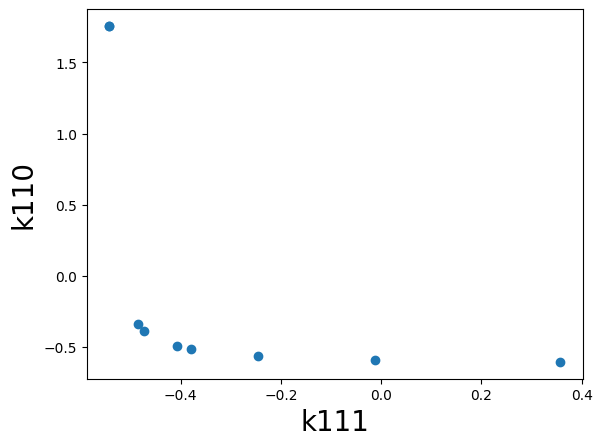

In [11]:
plt.scatter(cities['k110'], cities['k111'])
plt.xlabel('k111', fontsize=20)
plt.ylabel('k110', fontsize=20)
plt.show()

### Proximity in the Product Space